In [ ]:
import pandas as pd
df = pd.read_csv("/home/ifte/amiebot_project/Large_files/mobicontrol_data/Train_Test_Data/english/mobicontrol_data_en.csv")
df

In [10]:
df.columns

Index(['page', 'file', 'url', 'title', 'text'], dtype='object')

In [27]:
import numpy as np
classes = df.page.unique()

container = []
for i in range(len(classes)):
    arr_index = df[df.page == i].text.values
    u = df[df.page == i].url.values
    t = df[df.page == i].title.values
    
    x = np.array(u)
    y = np.array(t)
    
    #if list(arr_index):
    k = [i] + list(np.unique(x)) + list(np.unique(y)) + list(arr_index)
        # print(i," ",k)

    container.append(k)

In [ ]:
str_list = filter(None, container) # fastest
#container
list(str_list)

In [ ]:
df_per_page = pd.DataFrame(container)
df_per_page

In [30]:
Data_cols = df_per_page.iloc[:,4:-1]

In [31]:
df_per_page['Merged_text'] = Data_cols.apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [ ]:
df_per_page[['Merged_text']].head()

In [33]:
page_link = df_per_page.iloc[:,0:3]


In [ ]:
output = pd.concat((page_link,df_per_page[['Merged_text']]), axis=1)
output.head()


In [ ]:
out = output.rename({0: 'page', 1: 'link', 2: 'title'}, axis='columns')
out.head()

In [ ]:
without_nan = out.replace(np.nan, '', regex=True)
without_nan

In [45]:
from urllib.parse import urlparse
import re

link_text = []

for index, row in without_nan.iterrows():

    disassembled = urlparse(row['link'])
    only_url = re.sub('/mc/help/v14.0/en/','',disassembled.path)
    only_url = re.sub('.html','',only_url)
    only_url = re.sub('_',' ',only_url)
    only_url = re.sub('/',' ',only_url)
    link_text.append(only_url)

In [ ]:
link_text

In [ ]:
without_nan['parsed_link'] = link_text

In [51]:
s = without_nan.title + " " +without_nan.parsed_link
without_nan['Summary'] = s

In [ ]:
without_nan.head()

In [55]:
dataset = without_nan.rename(columns={"Merged_text":"Article"})
dataset.to_csv("dataset.csv")

In [9]:
import pandas as pd
df = pd.read_csv("/home/ifte/amiebot_project/MyAI/AI-system/Helpers/dataset.csv", usecols=['Article', 'Summary'])
df.head()

,Article,Summary
0,NaN,
1,Help Version: 14.4 14.3 14.2 14.1 14.0 13 12 1...,banner
2,NaN,MobiControl Help toc
3,Find pages containing: Match case Match whole ...,Search search
4,SOTI MobiControl Help SOTI MobiControl is an e...,Welcome to SOTI MobiControl Help start


In [ ]:
def remove_special_characters(text):
    regex = r'[^a-zA-Z0-9\s]'
    text = re.sub(regex,'',text)
    text = re.sub("\d+","",text)
    return text

import re
# from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# nltk.download('averaged_perceptron_tagger')
Stopwords = set(stopwords.words('english'))
wordlemmatizer = WordNetLemmatizer()
# ps = PorterStemmer() 

def preprocess_text(sentence):
    sentence = remove_special_characters(sentence)
    tokenized_words = word_tokenize(sentence)
    tokenized_words = [word for word in tokenized_words if word not in Stopwords]
    tokenized_words = [word for word in tokenized_words if len(word) > 1]
    tokenized_words = [word.lower() for word in tokenized_words]
    tokenized_words = [wordlemmatizer.lemmatize(w) for w in tokenized_words]
#     tokenized_words = [ps.stem(w) for w in tokenized_words]
    return " ".join(tokenized_words)

df.Summary = df.Summary.apply(lambda x: preprocess_text(str(x)))
df.Article = df.Article.apply(lambda x: preprocess_text(str(x)))
df.head()

df["Summary"][52]

In [14]:
def remove_duplicate(text):        
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

df.Summary = df.Summary.apply(lambda x: remove_duplicate(str(x)))
df.Article = df.Article.apply(lambda x: remove_duplicate(str(x)))

df["Summary"][52]

'managing user console user'

In [27]:
df = df[df.Summary != ""]
df = df[df.Summary != "nan"]
df = df[df.Article != ""]
df = df[df.Article != "nan"]
df.head()

,Article,Summary
1,help version,banner
3,find page containing match case match whole wo...,search
4,soti mobicontrol help soti mobicontrol enterpr...,welcome soti mobicontrol help start
5,soti mobicontrol this section provides instruc...,setting up soti mobicontrol setup setupindex
6,soti mobicontrol each soti mobicontrol install...,setting up soti mobicontrol setup installing i...


In [28]:
df.to_csv("processed_dataset.csv")

In [2]:
import pandas as pd

df = pd.read_csv("/home/ifte/amiebot_project/MyAI/AI-system/Helpers/processed_dataset.csv")
# df.head()

In [3]:
df['SP_Tok_summ'] = df['Summary'].apply(lambda x : '_START_ '+ x + ' _END_')

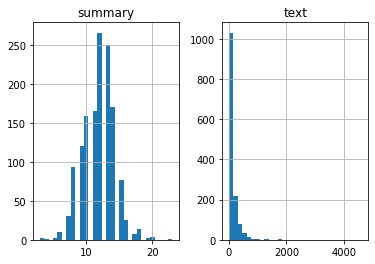

In [6]:
# df.SP_Tok_summ
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['Article']:
      text_word_count.append(len(i.split()))

for i in df['SP_Tok_summ']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()